<i>H<sub>θ</sub></i>: The proportion of theft from vehicles among all other types of crimes is the same in Stanley Park (p1) and other areas exluding Stanley Park in Vancouver (p2).
<i>H<sub>θ</sub></i>: p1 = p2
CBD, WEST END

<i>H<sub>1</sub></i>: The proportion of theft from vehicles among all other types of crimes in Stanley Park (p1) is less than the proportion in other areas exluding Stanley Park in Vancouver (p2).
<i>H<sub>1</sub></i>: p1 < p2

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(GGally)
library(ISLR)
library(infer)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
url = "https://raw.githubusercontent.com/abheetkansal/STAT-201-Group-34/main/crimedata_csv_AllNeighbourhoods_2022.csv?token=GHSAT0AAAAAAB2TZOS44IKRNIGXJSOHUK6CY3EJ6DQ"
crime_data <- read_csv(url)
head(crime_data)

Rows: 27883 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Theft from Vehicle,2022,4,16,9,58,1XX W HASTINGS ST,Central Business District,492101.0,5458837
Theft from Vehicle,2022,6,16,13,0,1XX W HASTINGS ST,Central Business District,492107.4,5458835
Theft from Vehicle,2022,4,19,19,0,1XX W HASTINGS ST,Central Business District,492113.5,5458843
Theft from Vehicle,2022,6,5,20,30,1XX W HASTINGS ST,Central Business District,492182.6,5458822
Theft from Vehicle,2022,4,16,19,17,1XX W HASTINGS ST,Central Business District,492197.2,5458808
Theft from Vehicle,2022,1,4,3,54,1XX W PENDER ST,Central Business District,492073.2,5458730


In [4]:
crime_data_cleaned <- crime_data %>% 
    filter(TYPE == "Offence Against a Person" | TYPE == "Other Theft")%>%
    filter(!is.na(NEIGHBOURHOOD)) %>%
    filter(!is.na(TYPE))%>%
    select(TYPE,NEIGHBOURHOOD)
head(crime_data_cleaned)

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Offence Against a Person,Stanley Park
Offence Against a Person,Stanley Park
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End


In [6]:
crime_data_cleaned2 <- crime_data_cleaned  %>%
    filter(NEIGHBOURHOOD == "Central Business District" | NEIGHBOURHOOD == "West End")
head(crime_data_cleaned2)

TYPE,NEIGHBOURHOOD
<chr>,<chr>
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End
Offence Against a Person,West End


In [14]:
crime_count<-crime_data_cleaned2 %>%
    group_by(NEIGHBOURHOOD) %>%
    count(TYPE)
crime_count

NEIGHBOURHOOD,TYPE,n
<chr>,<chr>,<int>
Central Business District,Offence Against a Person,1148
Central Business District,Other Theft,2665
West End,Offence Against a Person,387
West End,Other Theft,686


In [15]:
obs_diff_prop1 <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Offence Against a Person") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
obs_diff_prop1

stat
<dbl>
-0.05959575


In [16]:
obs_diff_prop2 <- crime_data_cleaned2 %>%
    specify(formula = TYPE ~ NEIGHBOURHOOD, success = "Other Theft") %>%
    calculate(stat = "diff in props", order = c("Central Business District", "West End"))
obs_diff_prop2

stat
<dbl>
0.05959575


In [17]:
# crime_data_eda <- crime_data_cleaned2 %>%
#                     group_by(NEIGHBOURHOOD)%>%
#                     summarize(Stanley_Park = sum(NEIGHBOURHOOD=='Stanley Park'),West_End=sum(NEIGHBOURHOOD=='West End'),Total = n())%>%
#                     mutate(Stanley_Park_Prop = Stanley_Park/Total, West_End_Prop = West_End/Total)%>%
#                     pivot_longer(cols=Stanley_Park_Prop:West_End_Prop,
#                     names_to="prop_type",
#                     values_to="prop")%>%
#                     select(prop_type,TYPE,prop)
# crime_data_eda

$y
[1] "Proportion"

attr(,"class")
[1] "labels"

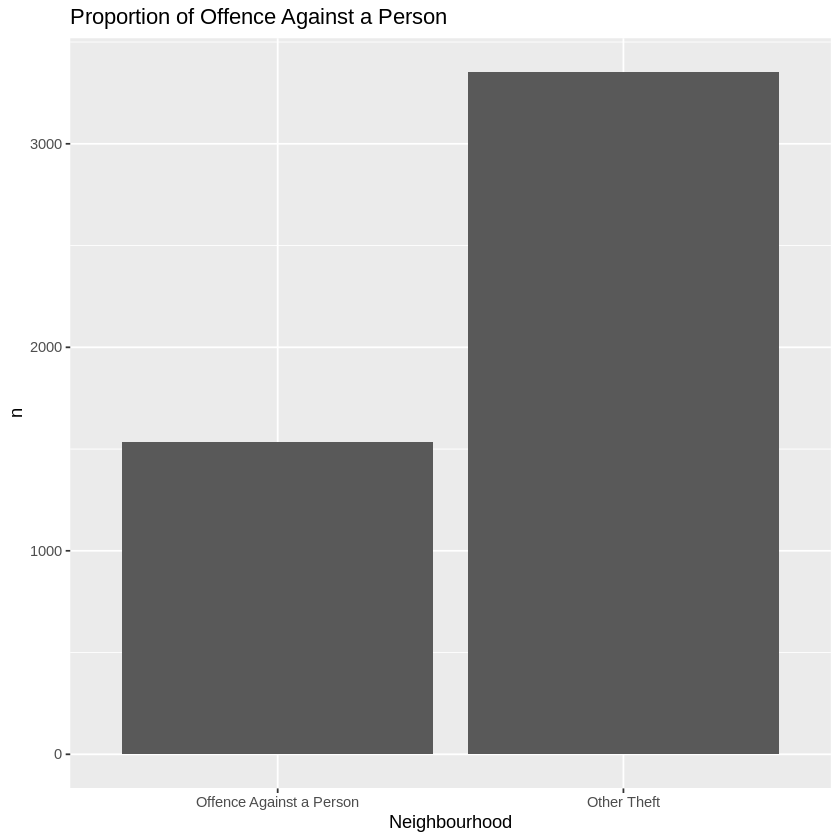

In [21]:
crime_data_prop_plot <- crime_count %>%
       ggplot(aes(x = TYPE, y = n)) + 
       geom_col() +
       ggtitle("Proportion of Offence Against a Person") +
       xlab("Neighbourhood")
       ylab("Proportion")

crime_data_prop_plot

**INTRODUCTION:**
Background Information:
Vancouver’s crime rates have drastically increased recently, with a crime index of 39.18% (Numbeo, 2022), where crime levels of 40%-60% are considered moderate. This surge is due to the results of the loss of jobs caused by the pandemic (CBC News, 2022), increase in rent (CBC News, 2022), and the increased use of drugs often leading to homelessness, hence forcing many to commit crime in order to survive. It can then be deduced that more disadvantaged areas such as Downtown East Side, and South Vancouver neighborhoods (Webster, N.A.) would experience higher rates of crime. Hence, this results in an increasingly unsafe environment for Vancouver residents and requires increased surveillance by law enforcement in neighborhood areas. 

**Research Question:**
<i>H<sub>θ</sub></i> = The proportion of theft from vehicles among all other types of crime is the same in Central Business District and West End in Vancouver<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<i>H<sub>1</sub></i> = The proportion of theft from vehicles among all other types of crime in West End is less than the proportion in Central Business District in Vancouver 

**Dataset Information:** 
The crime data set we will be using is from the <i>Crime Data Download</i> published by the <i>Vancouver Police Department</i>. Looking specifically at the year 2022, in all the neighborhoods, and focusing on the crime type of: Crime Against a Person. 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Crime Type</td>
    <td>&nbsp;&nbsp;&nbsp;Crime Against Person</td>
  </tr>
  <tr>
    <td>Year</td>
    <td>&nbsp;&nbsp;&nbsp;2022</td>
  </tr>
  <tr>
      <td>Neighbourhood</td>
      <td>
          <ol type="1">
               <li><b>Central Buisness District</b></li>
               <li><b>West End</b></li>
          </ol>
      </td>
  </tr>
</table>

We’ve hypothesized that the neighborhood Central Business District and West end as both are located in Downtown Vancouver would have the highest rates of Crime Against a Person due to the nature of the neighborhood.

**METHODS: PLAN**
We’ll begin by using Hypothesis testing to assess the plausibility of the hypothesis, whether the data obtained from samples provides evidence against our claim that H. Through the infer workflow, which ensures tidy and clean data while using expressive grammar for the statistical inference, we will calculate the p-value. The p-value will be used to reject the null hypothesis H. Then through samples obtained through bootstrap resampling with replacement, which allows us to mimic sampling variation without the full population, we will calculate our point estimate of sample proportion and visualize the results with a confidence interval of 95% to conclude to stakeholders how confident we are with the results. 

We expect that the p-value to be smaller than the significance level to reject H. This can prove our point that the Central Business District has higher crime rates than the West End. 

The significance of this report and its final results can allow us to determine which areas require higher levels of law enforcement and increased levels of safety.

**REFERENCES:**
CBC News. 2022. New study shows higher incidence of violent crime in poor Vancouver neighborhoods,theft in wealthier ones. [assessed 2022 Oct 29].
https://www.cbc.ca/news/canada/british-columbia/sfu-study-vancouver-crime-impacts-1.6323902#:~:text=Andresen%20says%20this%20can%20be,happened%20normally%2C%22%20he%20said.

The Canadian Press. 2017. Soaring rents push homelessness to all-time high in vancouver’s DTES. [assessed 2022 Oct 29]. https://www.cbc.ca/news/canada/british-columbia/rent-increase-dtes-vancouver-homelessness-1.4034161.

Numbeo. Crime in Vancouver, Canada. Numbeo. [assessed 2022 Oct 29]. https://www.numbeo.com/crime/in/Vancouver.

Webster B R. How are the bad areas in Vancouver? [assessed 2022 Oct 29]. https://newcanadianlife.com/what-are-the-bad-areas-in-vancouver/.


